In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib

matplotlib.rcParams

matplotlib.rcParams['font.family']

current_font_list = matplotlib.rcParams['font.family']

font_path = 'C:\\Windows\\Fonts\\batang.ttc'

kfont = matplotlib.font_manager.FontProperties(fname=font_path).get_name()

matplotlib.rcParams['font.family'] = [kfont] + current_font_list

In [117]:
pd_data = pd.read_csv('자동차등록대수현황_시도별_20230410201013.csv', encoding='cp949', header=[1,2])

pd_data.drop('시도명(1)', axis=1, inplace=True)
pd_data.set_index(('시군구(1)','시군구(1)'), inplace=True)
pd_data.index.name = '지역구'
pd_data

C:\Users\tpgns\AppData\Local\Temp\ipykernel_8188\2299671848.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  pd_data.drop('시도명(1)', axis=1, inplace=True)


승용                  승합               화물               특수           
       관용     자가용    영업용   관용   자가용   영업용   관용    자가용   영업용  관용  자가용   영업용
지역구                                                                       
금정구    96   66781   2555   62  2193   784  102   9785  3229  14  172   665
기장군    80   70924    795   54  2181   546  117  10742  1133  11  208   207
남구    104   79389   2848   62  2192   426   54   9127  4639   3  282  1543
동구     83   37106   1900   48   911   180   60   3608  2544   4   96  1060
동래구    81   84943   1494   29  2063   367   66  10196  1478   1  187   256
부산진구  130  110868  18647   62  2957   558  165  13105  2244  11  176   519
북구     96   87822   1522   50  2319   322   87  12239  1620   5  191   235
사상구    90   66028   2555   70  2230   317  113  14818  2304  11  204   325
사하구   101   92303   3460   53  2833   336  103  13117  1977   9  187   289
서구     63   25678    399   34   941    22   42   3619   993   1   56    93
수영구    52   58043  52460   25  1492  1027   79   5748  1153  11  125   364
연제구   305   98876  10633  469  1684   536  177   8409  2228  29  171   701
영도구    85   26372   1322   49  1014   299   84   4139   368  10   47    53
해운대구  132  149127  13571   61  3323   266  125  13266  2146   9  292   500

In [120]:
df2 = pd_data.stack(level=0).reset_index()

filter1 = df2['지역구'] == '기장군'
df3 = df2.loc[filter1,:]
# df3['color'] = pd.Series(['r', 'g', 'b', 'y'])    # NaN으로 반영됨
df3['color'] = ['red', 'green', 'blue', 'purple']

df3


C:\Users\tpgns\AppData\Local\Temp\ipykernel_8188\2805599170.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['color'] = ['red', 'green', 'blue', 'purple']


,지역구,level_1,관용,영업용,자가용,color
4,기장군,승용,80,795,70924,red
5,기장군,승합,54,546,2181,green
6,기장군,특수,11,207,208,blue
7,기장군,화물,117,1133,10742,purple


([<matplotlib.patches.Wedge at 0x1948e6c9050>,
 [Text(-0.9701636828617771, 0.5184423096701054, ''),
  Text(0.6837383318386443, -0.8616854957433762, ''),
  Text(0.7578521661762381, -0.797282944895966, ''),
  Text(1.0125290583823954, -0.4298661488548031, '')])

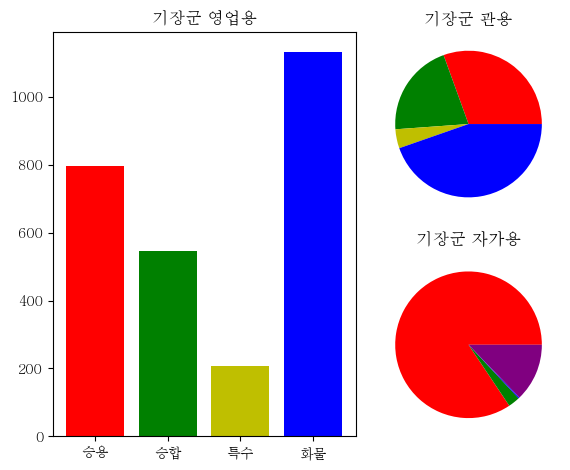

In [121]:
fig = plt.figure(layout='tight')

axe1 = fig.add_subplot(1,2,1)
axe1.set_title("기장군 영업용")
axe1.bar(df3['level_1'], df3['영업용'], color=['r', 'g', 'y', 'b'])

axe2 = fig.add_subplot(2,2,2)
axe2.set_title('기장군 관용')
axe2.pie(df3['관용'], colors=['r', 'g', 'y', 'b'])

axe3 = fig.add_subplot(2,2,4)
axe3.set_title('기장군 자가용')
axe3.pie(df3['자가용'], colors=df3['color'])